In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [66]:
iris_data = load_iris()
X = iris_data.data
y_original = iris_data.target
y = tf.keras.utils.to_categorical(y_original)
assert y.shape == (150,3)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [67]:
model = Sequential()
model.add(Input(shape=X_train[0].shape))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [68]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [69]:
history = model.fit(X_train,y_train, epochs=200, batch_size=5)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3417 - loss: 4.9346   
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3333 - loss: 3.8432     
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3417 - loss: 2.7890 
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4083 - loss: 1.9617 
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3417 - loss: 1.9341 
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4583 - loss: 1.2741 
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4250 - loss: 1.2338 
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4750 - loss: 1.1481 
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5083 - loss: 1.0320 
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5167 - loss: 0.9014 
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5083 - loss: 0.8685 
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms

In [70]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

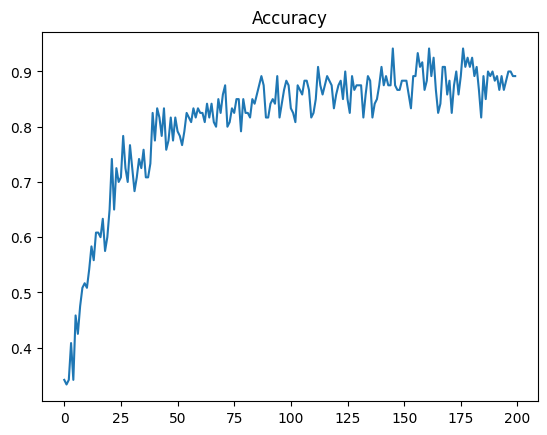

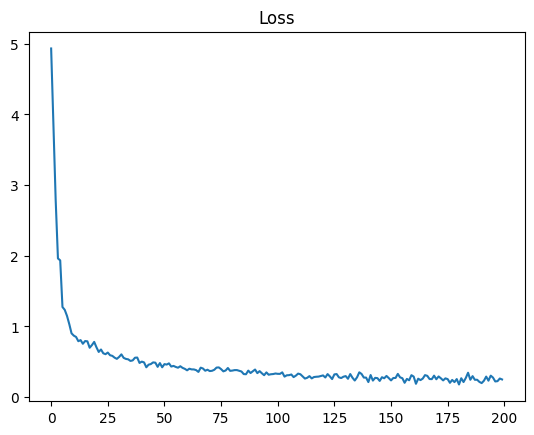

In [71]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(history.history['accuracy'],label = "accuracy")
plt.title('Accuracy')
plt.figure(2)
plt.title('Loss')
plt.plot(history.history['loss'],label = "loss")

In [72]:
results = model.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9667 - loss: 0.1306
